In [1]:
from datascience import *
%matplotlib inline
from path_data_variable import *
import matplotlib.pyplot as plots
plots.style.use('fivethirtyeight')
import numpy as np

In [2]:
def standard_units(any_numbers):
    "Convert any array of numbers to standard units."
    return (any_numbers - np.mean(any_numbers))/np.std(any_numbers)  

def correlation(t, x, y):
    return np.mean(standard_units(t.column(x))*standard_units(t.column(y)))

def slope(table, x, y):
    r = correlation(table, x, y)
    return r * np.std(table.column(y))/np.std(table.column(x))

def intercept(table, x, y):
    a = slope(table, x, y)
    return np.mean(table.column(y)) - a * np.mean(table.column(x))

def fit(table, x, y):
    """Return the height of the regression line at each x value."""
    a = slope(table, x, y)
    b = intercept(table, x, y)
    return a * table.column(x) + b

In [3]:
shotput = Table.read_table(path_data + 'shotput.csv')

In [4]:
shotput

Weight Lifted | Shot Put Distance
37.5          | 6.4
51.5          | 10.2
61.3          | 12.4
61.3          | 13
63.6          | 13.2
66.1          | 13
70            | 12.7
92.7          | 13.9
90.5          | 15.5
90.5          | 15.8
... (18 rows omitted)

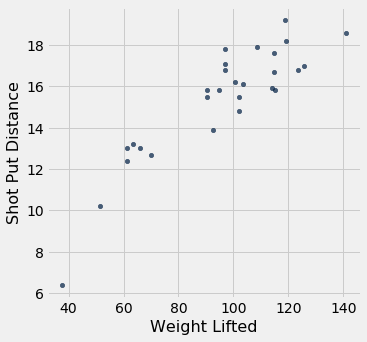

In [5]:
shotput.scatter('Weight Lifted')

In [6]:
slope(shotput, 'Weight Lifted', 'Shot Put Distance')

0.09834382159781997

In [7]:
intercept(shotput, 'Weight Lifted', 'Shot Put Distance')

5.959629098373952

In [8]:
def shotput_linear_mse(any_slope, any_intercept):
    x = shotput.column('Weight Lifted')
    y = shotput.column('Shot Put Distance')
    fitted = any_slope*x + any_intercept
    return np.mean((y - fitted) ** 2)

In [9]:
minimize(shotput_linear_mse)

array([0.09834382, 5.95962911])

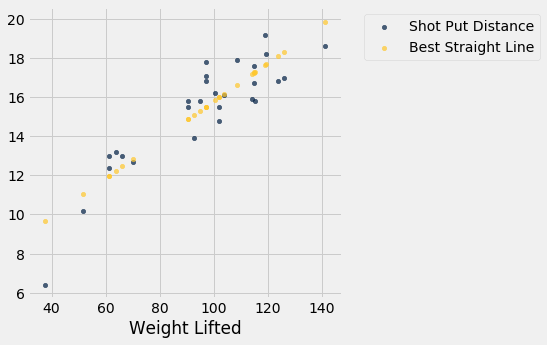

In [10]:
fitted = fit(shotput, 'Weight Lifted', 'Shot Put Distance')
shotput.with_column('Best Straight Line', fitted).scatter('Weight Lifted')

In [11]:
def shotput_quadratic_mse(a, b, c):
    x = shotput.column('Weight Lifted')
    y = shotput.column('Shot Put Distance')
    fitted = a*(x**2) + b*x + c
    return np.mean((y - fitted) ** 2)

In [12]:
best = minimize(shotput_quadratic_mse)
best

array([-1.04004838e-03,  2.82708045e-01, -1.53182115e+00])

In [13]:
(-0.00104)*(100**2) + 0.2827*100 - 1.5318

16.3382

In [14]:
x = shotput.column(0)
shotput_fit = best.item(0)*(x**2) + best.item(1)*x + best.item(2)

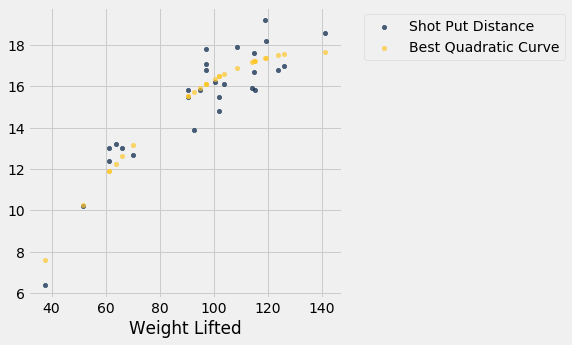

In [15]:
shotput.with_column('Best Quadratic Curve', shotput_fit).scatter(0)